# <center>Geometric Brownian Motion</center>

### <center>continuous time</center>

$$
\frac{dS_t}{S_t}
=
(r+\sigma\lambda)\,dt
+
\sigma\,dW_t
$$

### <center>discrete time</center>

$$
\frac{S_{t+dt}-S_t}{S_t}
=
(r + \sigma\lambda)\,dt
+
\sigma \sqrt{dt}\,\xi_t
$$

<center>which can be simplied to</center>

$$ \frac{S_{t+dt}-S_t}{S_t}
=
\mu dt
+
\sigma\sqrt{dt}\xi_t
$$

In [1]:
import numpy as np
import pandas as pd

In [2]:
def gbm(n_years=10, mu=0.07, sigma=0.15, steps_per_year=12):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    xi = np.random.normal(size=n_steps)
    rets = ((1+mu)**dt)-1 + sigma*np.sqrt(dt)*xi
    return pd.DataFrame(rets)

<Axes: >

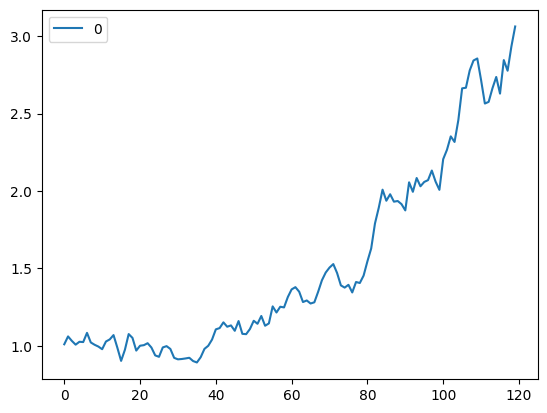

In [3]:
rets = gbm()
wealth_index = (1+rets).cumprod()
wealth_index.plot()

In [4]:
def gbm(n_years=10, n_scenarios=100, mu=0.07, sigma=0.15, steps_per_year=12):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = ((1+mu)**dt)-1 + sigma*np.sqrt(dt)*xi
    return pd.DataFrame(rets)

<Axes: >

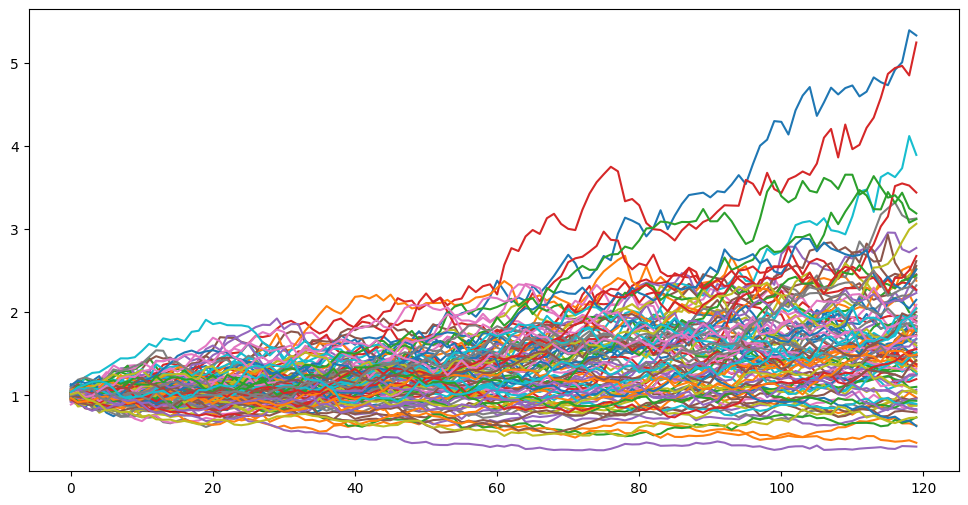

In [5]:
rets = gbm()
wealth_index = (1+rets).cumprod()
wealth_index.plot(legend=False, figsize=(12, 6))

In [6]:
def gbm(n_years=10, n_scenarios=100, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = ((1+mu)**dt)-1 + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    return s_0*(1+rets).cumprod()

<Axes: >

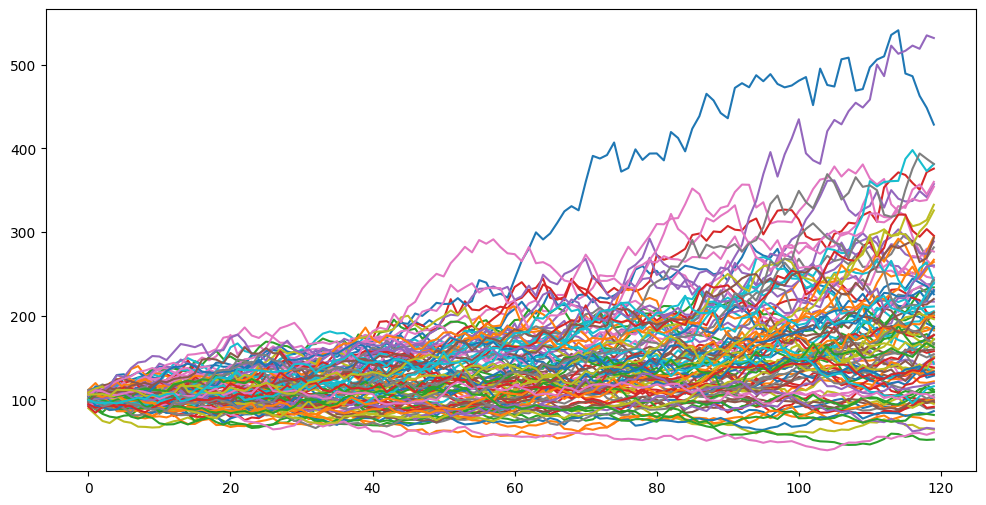

In [7]:
gbm().plot(legend=False, figsize=(12, 6))

In [8]:
def gbm(n_years=10, n_scenarios=100, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    rets_p_1 = np.random.normal(loc=((1+mu)**dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    return s_0*pd.DataFrame(rets_p_1).cumprod()

<Axes: >

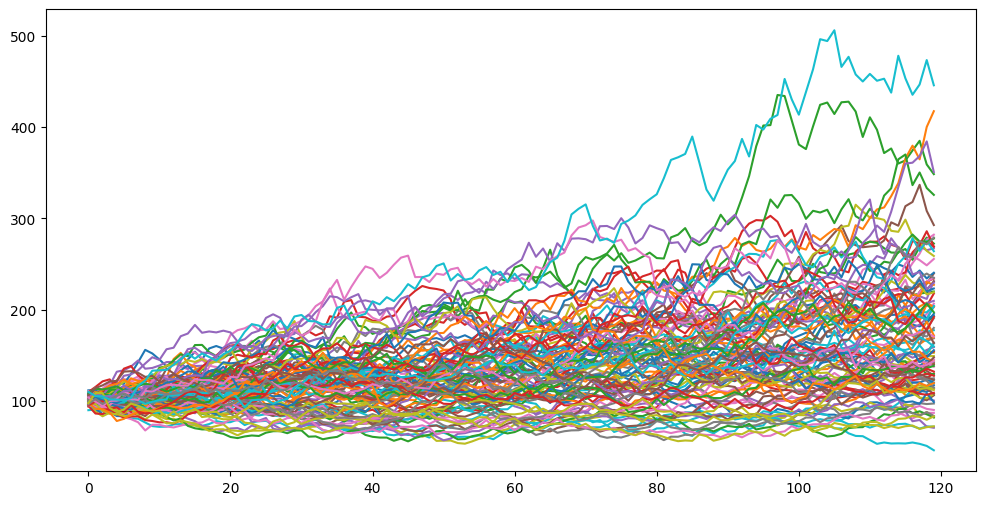

In [9]:
gbm().plot(legend=False, figsize=(12, 6))

In [10]:
def gbm_original(n_years=10, n_scenarios=100, mu=0.07, sigma=0, steps_per_year=12, s_0=100):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    rets_p_1 = np.random.normal(loc=((1+mu)**dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    return s_0*pd.DataFrame(rets_p_1).cumprod()

def gbm_overwrite(n_years=10, n_scenarios=100, mu=0.07, sigma=0, steps_per_year=12, s_0=100):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    rets_p_1 = np.random.normal(loc=((1+mu)**dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    rets_p_1[0] = 1
    return s_0*pd.DataFrame(rets_p_1).cumprod()

def gbm_prepend(n_years=10, n_scenarios=100, mu=0.07, sigma=0, steps_per_year=12, s_0=100):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    rets_p_1 = np.random.normal(loc=((1+mu)**dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    rets_p_1 = pd.concat([pd.DataFrame(np.ones((1, n_scenarios))), pd.DataFrame(rets_p_1)], ignore_index=True)
    return s_0*rets_p_1.cumprod()

In [11]:
gbm_original().iloc[-1:].mean(axis=1)

119    196.715136
dtype: float64

In [12]:
gbm_overwrite().iloc[-1:].mean(axis=1)

119    195.609133
dtype: float64

In [13]:
gbm_prepend().iloc[-1:].mean(axis=1)

120    196.715136
dtype: float64

In [14]:
def gbm(n_years=10, n_scenarios=100, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100):
    dt = 1/steps_per_year
    n_steps = n_years*steps_per_year
    rets_p_1 = np.random.normal(loc=((1+mu)**dt), scale=sigma*np.sqrt(dt), size=(n_steps, n_scenarios))
    rets_p_1 = pd.concat([pd.DataFrame(np.ones((1, n_scenarios))), pd.DataFrame(rets_p_1)], ignore_index=True)
    return s_0*rets_p_1.cumprod()

<Axes: >

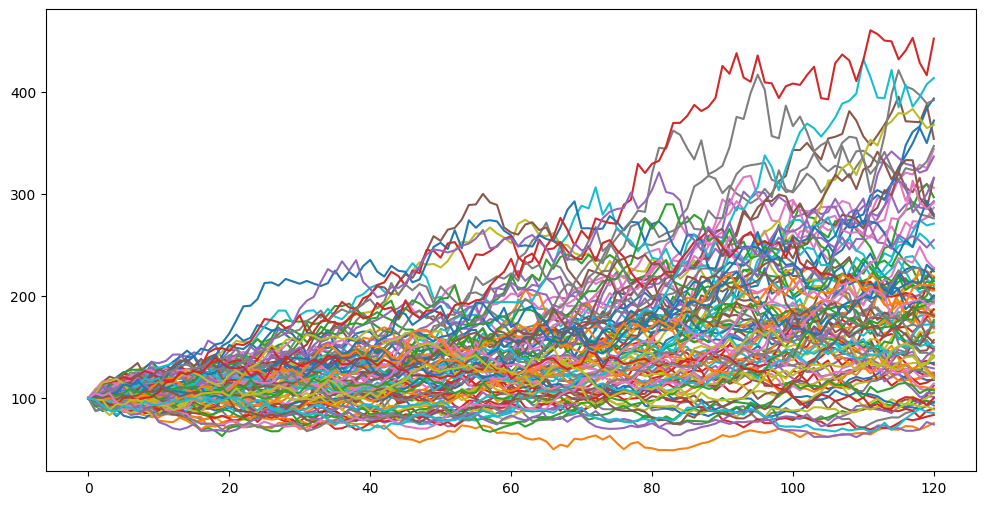

In [15]:
gbm().plot(legend=False, figsize=(12, 6))

# <center>Interactive Plotting</center>

In [16]:
import ipywidgets as widgets

In [17]:
def func(n):
    return n * 2

In [18]:
widgets.interact(func, n=(0, 100, 2))

interactive(children=(IntSlider(value=50, description='n', step=2), Output()), _dom_classes=('widget-interact'…

<function __main__.func(n)>

In [19]:
import matplotlib.pyplot as plt

In [20]:
def interactive_gbm(n_years=10, n_scenarios=100, mu=0.07, sigma=0.15, s_0=100):
    prices = gbm(n_years=n_years, n_scenarios=n_scenarios, mu=mu, sigma=sigma, s_0=s_0)
    terminal_wealth = prices.iloc[-1]

    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios':[2, 1]}, figsize=(24, 10))
    plt.subplots_adjust(wspace=0)

    prices.plot(ax=wealth_ax, legend=False, color='skyblue')
    wealth_ax.axhline(y=s_0, ls='--', color='black')
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='white', color='skyblue', orientation='horizontal')

In [21]:
widgets.interactive(interactive_gbm, n_years=(1, 30), n_scenarios=(1, 1000), mu=(-0.1, 0.1, 0.01), sigma=(0, 0.3, 0.01), s_0=(100, 1000))

interactive(children=(IntSlider(value=10, description='n_years', max=30, min=1), IntSlider(value=100, descript…